# **Final Project - Lập trình cho Khoa học Dữ liệu**

## **Thông tin nhóm**

#### Thành viên 1:
* **Họ và tên:** Võ Duy Anh
* **MSSV:** 21127221

#### Thành viên 2:
* **Họ và tên:** Nguyễn Mậu Gia Bảo
* **MSSV:** 21127583

## **Thông tin đồ án**

### **Nội dung**
1. Collecting data
2. Exploring data
3. Asking meaningful questions
4. Preprocessing + analyzing data to answer each question
5. Reflection
6. References

### **Thư viện hỗ trợ**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import numpy as np

### **1. Collecting data**

#### What subject is your data about? What is the source of your data?

#### Do authors of this data allow you to use like this? You can check the data license

#### How did authors collect data?

### **2.Exploring data**

#### Read data from file

In [3]:
data = pd.read_csv("Airline Dataset.csv")
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


#### How many rows and how many columns does the data have?

In [4]:
shape = data.shape
print(f"Data current shape: {shape}")

Data current shape: (98619, 15)


In [5]:
row,col = data.shape
print(f'Data have {row} rows and {col} columns')

Data have 98619 rows and 15 columns


#### What is the meaning of each row?

Mỗi dòng là thông tin của 1 hành khách và chuyến bay cụ thể

#### Does the data have duplicate rows?

In [6]:
index = data.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

In [7]:
# TEST
if num_duplicated_rows == 0:
    print(f"Data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Data have {num_duplicated_rows} duplicated " + ext + ".")

Data have no duplicated line.!


#### What is the meaning of each column?

|Cột|Ý nghĩa|
|---|---|
|**Passenger ID**|Mã định danh duy nhất cho mỗi hành khách| 
|**First Name**|Tên của hành khách|
|**Last Name**|Họ của hành khách|
|**Gender**|Giới tính của hành khách|
|**Age**|Tuổi của hành khách|
|**Nationality**|Quốc tịch của hành khách|
|**Airport Name**|Tên sân bay nơi hành khách lên máy bay|
|**Airport Country Code**|Mã quốc gia của sân bay xuất phát|
|**Country Name**|Tên quốc gia của sân bay xuất phát|
|**Airport Continent**|Châu lục của sân bay xuất phát|
|**Continents**|Các châu lục liên quan đến đường bay|
|**Departure Date**|Ngày chuyến bay khởi hành|
|**Arrival Airport**|Sân bay đến của chuyến bay|
|**Pilot Name**|Tên phi công điều hành chuyến bay|
|**Flight Status**|Tình trạng hiện tại của chuyến bay (ví dụ: đúng giờ, bị hoãn, bị hủy)|

#### What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
column_types = data.dtypes
print(column_types)

Passenger ID             int64
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object


* Các cột `First Name`, `Last Name`, `Gender `, `Nationality`, `Airport Name`, `Airport Country Code`, `Country Name `, `Airport Continent`, `Continents`, `Arrival Airport`, `Pilot Name`,`Flight Status` có kiểu dữ liệu ở dạng chuỗi, kiểu dữ liệu này đã phù hợp.
* Cột `Age` có kiểu dữ liệu là int64, kiểu dữ liệu này đã phù hợp.
* Cột `Departure Date` có kiểu dữ liệu ở dạng chuỗi. Để thuận tiện hơn cho việc xử lý thời gian, cần chuyển về dạng Datetime
* Cột `Passenger ID ` có kiểu dữ liệu là int64. Tuy nhiên vì đây là mã định danh duy nhất của mỗi hành khách, cần chuyển về dạng chuỗi      

In [9]:
data['Departure Date'] = pd.to_datetime(data['Departure Date'], format='%m/%d/%Y')
data['Passenger ID'] = data['Passenger ID'].astype(str)


Since the `Departure Date` column only carries general values, we can extract more useful information from this data. The special thing is that the extracted information will be categorical values.

In [10]:
if 'Departure Date' in data.columns:
    # Extract time features from `publishedAt` column
    data['day'] = data['Departure Date'].dt.day
    data['day_of_week'] = data['Departure Date'].dt.dayofweek  # Monday = 0, Sunday = 6
    data['month'] = data['Departure Date'].dt.month
    
    # Change datatype of the above columns to categorical
    data['day']  = data['day'].astype('str')
    data['day_of_week'] = data['day_of_week'].astype('str')
    data['month'] = data['month'].astype('str')

In [11]:
data.dtypes

Passenger ID                    object
First Name                      object
Last Name                       object
Gender                          object
Age                              int64
Nationality                     object
Airport Name                    object
Airport Country Code            object
Country Name                    object
Airport Continent               object
Continents                      object
Departure Date          datetime64[ns]
Arrival Airport                 object
Pilot Name                      object
Flight Status                   object
day                             object
day_of_week                     object
month                           object
dtype: object

#### For each column with numeric data type, how are the values distributed?

##### What is the percentage of missing values?

Ở cột `Age` và `Departure Date`, nhóm em xem tỉ lệ phần trăm dữ liệu bị thiếu là bao nhiêu

In [12]:
numDate_col_info_df =data.select_dtypes(exclude='object')
missing_percentage = (numDate_col_info_df.isnull().mean()) * 100
print('Percentage of missing values: ')
print(missing_percentage)

Percentage of missing values: 
Age               0.0
Departure Date    0.0
dtype: float64


Như vậy ở cả 2 cột đều đủ dữ liệu

##### Vì dữ liệu chỉ có cột `Age` là có kiểu dữ liệu là số nên nhóm em sẽ tính **min, lower quartile, median, upper quartile, max** trên cột `Age`

In [13]:
min_value = data['Age'].min()
max_value = data['Age'].max()
median_value = data['Age'].median()
lower_value = data['Age'].quantile(0.25)
upper_quartile_value = data['Age'].quantile(0.75)

print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Median: {median_value}")
print(f"Lower quartile: {lower_value}")
print(f"Upper quartile: {upper_quartile_value}")

Min: 1
Max: 90
Median: 46.0
Lower quartile: 23.0
Upper quartile: 68.0


##### Min, Max trên cột `Departure Date`

In [14]:
min_value = data['Departure Date'].min()
max_value = data['Departure Date'].max()

print(f"Min: {min_value}")
print(f"Max: {max_value}")


Min: 2022-01-01 00:00:00
Max: 2022-12-30 00:00:00


#### For each column with a non-numeric data type, how are the values distributed?

In [15]:
nonNum_col_info_df = data.select_dtypes(include='object')

##### What is the percentage of missing values?

In [16]:
missing_percentage_nonNum = (nonNum_col_info_df.isnull().mean()) * 100
print('Percentage of missing values: ')
print(missing_percentage_nonNum)

Percentage of missing values: 
Passenger ID            0.0
First Name              0.0
Last Name               0.0
Gender                  0.0
Nationality             0.0
Airport Name            0.0
Airport Country Code    0.0
Country Name            0.0
Airport Continent       0.0
Continents              0.0
Arrival Airport         0.0
Pilot Name              0.0
Flight Status           0.0
day                     0.0
day_of_week             0.0
month                   0.0
dtype: float64


Như vậy toàn bộ các cột đều không bị thiếu dữ liệu

##### How many different values? 

In [17]:
nonNum_col_unique_counts = nonNum_col_info_df.nunique()

# Hiển thị kết quả
print("Number of distinct values:")
print(nonNum_col_unique_counts)

Number of distinct values:
Passenger ID            59871
First Name               8437
Last Name               41658
Gender                      2
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Arrival Airport          9024
Pilot Name              98610
Flight Status               3
day                        31
day_of_week                 7
month                      12
dtype: int64


### **3. Asking meaningful questions**

#### Mức độ phân bố tuổi của hành khách là như thế nào?

#### Tỷ lệ on time, delayed, cancelled so với tổng thể ở từng quốc gia, châu lục?

#### Quốc gia, châu lục nào có số lượng hành khách nhiều nhất?

#### Thời gian trung bình mà các chuyến bay đã diễn ra?

### **4. Preprocessing + analyzing data to answer each question**

#### Pre-processing

In [18]:
data.sample(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,day,day_of_week,month
24976,12757,Lonnie,Hubach,Male,75,Poland,Negele Airport,ET,Ethiopia,AF,Africa,2022-12-19,EGL,Lonnie Hubach,Delayed,19,0,12
42167,69128,Gaye,Mallord,Female,17,China,Cross City Airport,US,United States,NAM,North America,2022-04-05,CTY,Gaye Mallord,Cancelled,5,1,4
31188,21594,Katee,Gravie,Female,30,Mauritius,Witham Field,US,United States,NAM,North America,2022-05-10,SUA,Katee Gravie,On Time,10,1,5
47614,70198,Robb,Blakey,Male,29,Cyprus,Anqing Tianzhushan Airport,CN,China,AS,Asia,2022-07-06,AQG,Robb Blakey,On Time,6,2,7
91868,35466,Roberto,Zuenelli,Male,37,Poland,Yellowstone Airport,US,United States,NAM,North America,2022-02-15,WYS,Roberto Zuenelli,On Time,15,1,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  object        
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

In [20]:
print("Số lượng giá trị null trong từng cột:")
print(data.isnull().sum())

Số lượng giá trị null trong từng cột:
Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
day                     0
day_of_week             0
month                   0
dtype: int64


#### Câu 1: Quốc gia, châu lục nào có số lượng hành khách nhiều nhất? 

**Trả lời câu hỏi này sẽ**


**Cách chúng tôi trả lời câu hỏi này**:

##### Bước 1: Tính số lượng hành khách theo quốc gia và theo châu lục

In [21]:
total_passengers_by_country = data.groupby("Country Name")["Passenger ID"].count().reset_index()
total_passengers_by_continent = data.groupby("Continents")["Passenger ID"].count().reset_index()

##### Bước 2: Tính 10 quốc gia có lượng hành khách nhiều nhất

In [22]:
top_10_countries = total_passengers_by_country.nlargest(10, 'Passenger ID')

/var/folders/th/94z5wy_n3sj3p3j85k9020yw0000gn/T/ipykernel_88483/3245659448.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


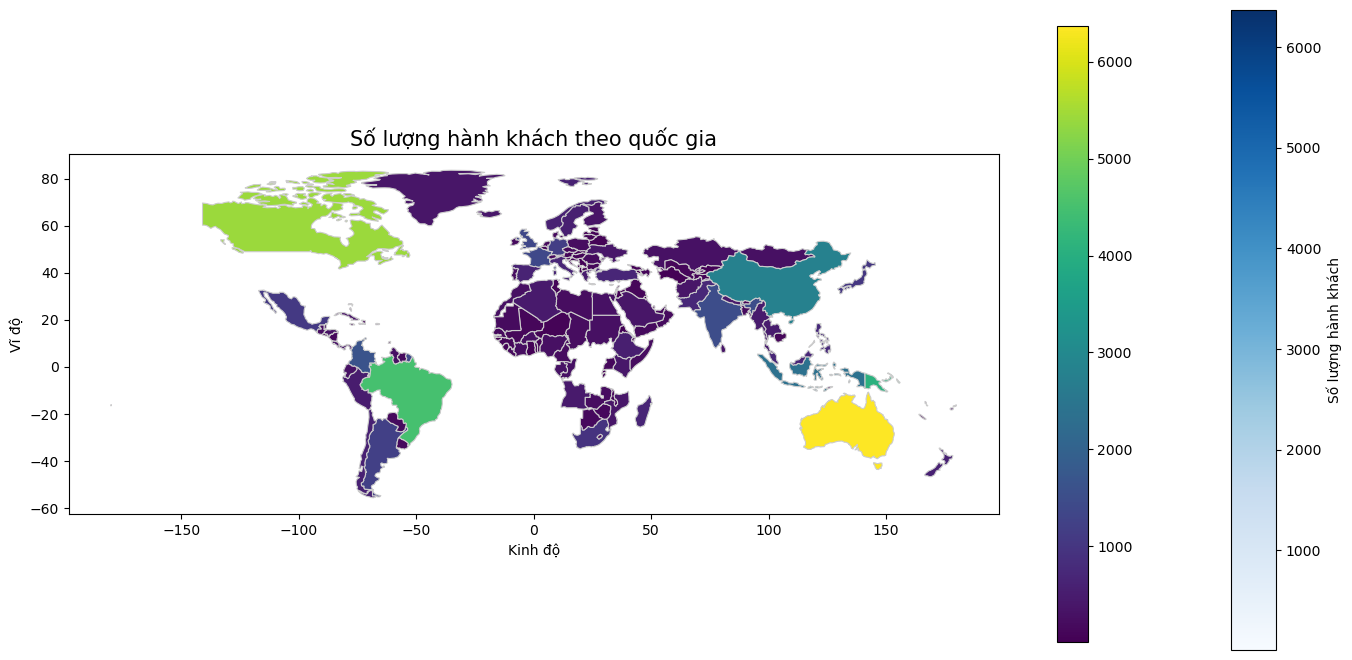

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Tập dữ liệu về địa lý của quốc gia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge dữ liệu với tập dữ liệu chứa thông tin về số lượng hành khách
merged_data = world.merge(total_passengers_by_country, how='left', left_on='name', right_on='Country Name')

# Trực quan hóa
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
merged_data.plot(column='Passenger ID', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Thiết lập tiêu đề và chú thích
ax.set_title('Số lượng hành khách theo quốc gia', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Kinh độ')
ax.set_ylabel('Vĩ độ')

# Hiển thị bảng chú thích
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=merged_data['Passenger ID'].min(), vmax=merged_data['Passenger ID'].max()))
sm._A = []
fig.colorbar(sm, cax=cax, label='Số lượng hành khách')

plt.show()

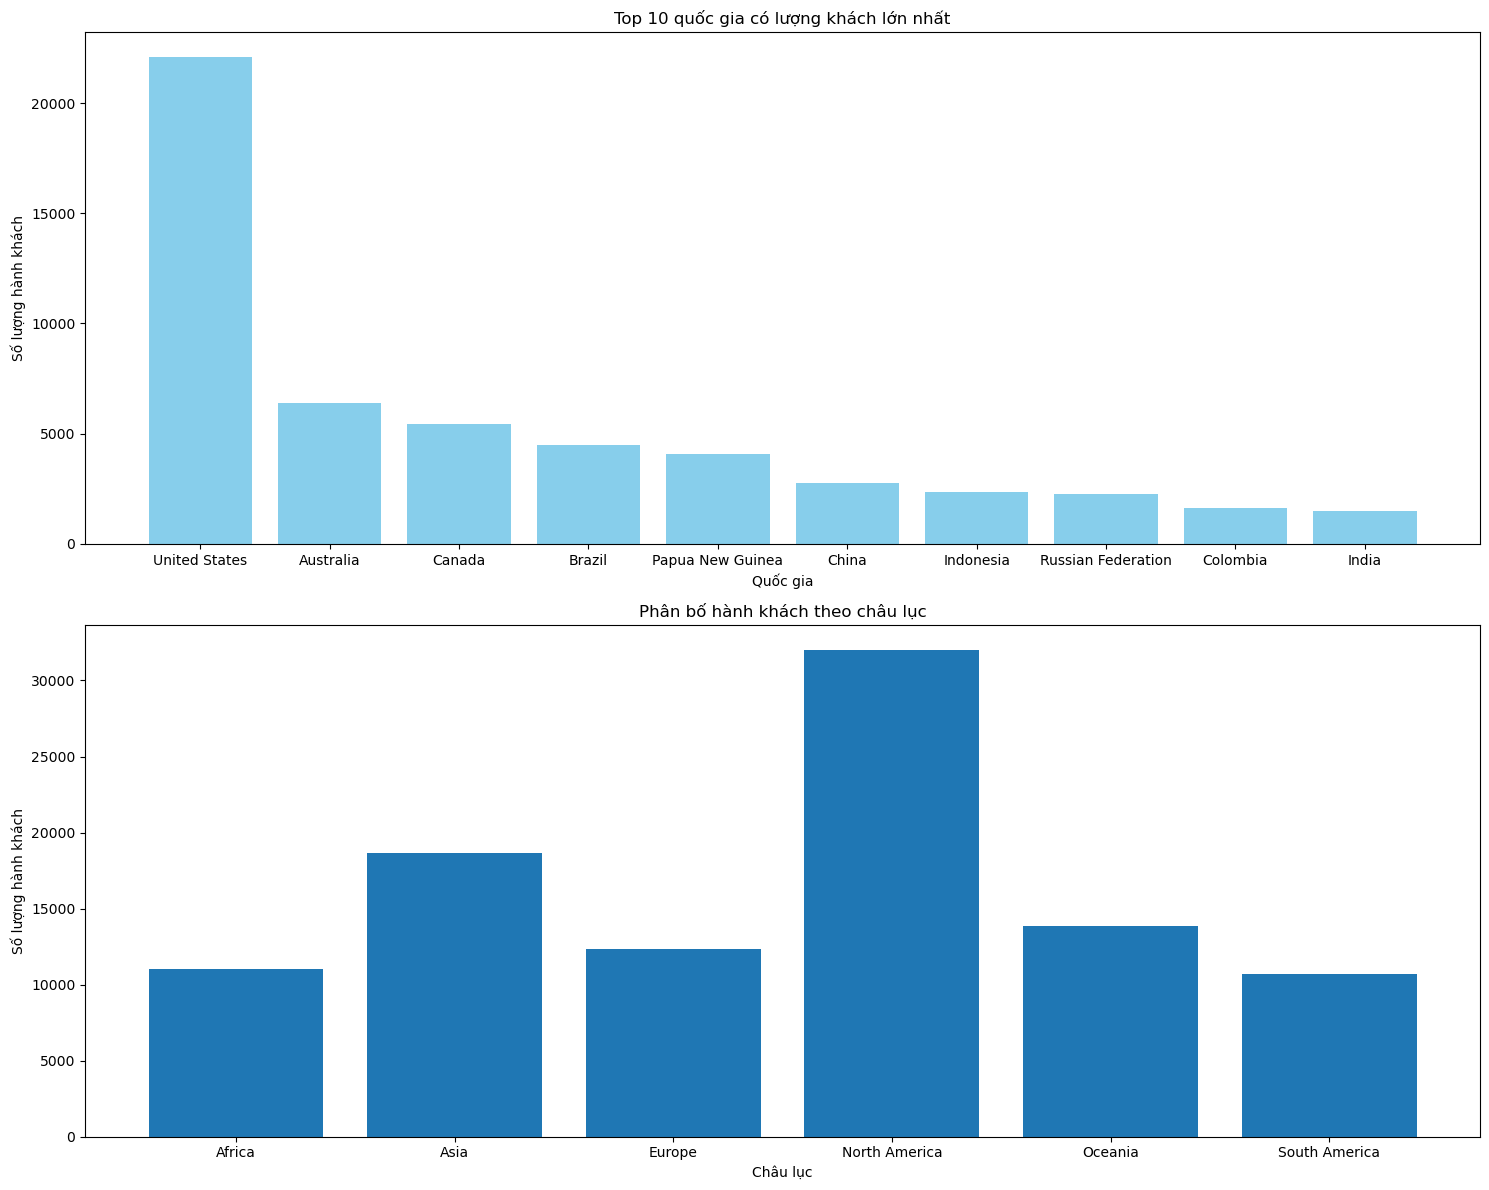

In [24]:
# Trực quan hóa
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Biểu đồ 1: 5 quốc gia có lượng khách lớn nhất
axes[0].bar(top_10_countries["Country Name"], top_10_countries["Passenger ID"], color='skyblue')
axes[0].set_title('Top 10 quốc gia có lượng khách lớn nhất')
axes[0].set_xlabel('Quốc gia')
axes[0].set_ylabel('Số lượng hành khách')

# Biểu đồ 2: Phân bố hành khách theo châu lục
axes[1].bar(total_passengers_by_continent["Continents"], total_passengers_by_continent["Passenger ID"])
axes[1].set_title('Phân bố hành khách theo châu lục')
axes[1].set_xlabel('Châu lục')
axes[1].set_ylabel('Số lượng hành khách')

plt.tight_layout()
plt.show()


In [25]:
df_c= pd.DataFrame(data['Country Name'].value_counts()).reset_index().rename(columns={"index": "value", 0: "count"})

In [26]:
con=data.loc[:,['Country Name','Continents']]
con=con.drop_duplicates()
new_df=pd.merge_ordered(df_c,con, fill_method= 'ffill', on= 'Country Name')

In [27]:
fig = px.sunburst(new_df, path=['Continents', 'Country Name'], values='count',
                  color='count', 
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(new_df['count'], weights=new_df['count']),
                  title= "Airport Country and Continent wise Passengers")
fig.show()

#### Câu 4: Thời gian trung bình mà các chuyến bay đã diễn ra?

##### Bước 1: Nhóm dữ liệu theo tháng

In [28]:
monthly_flights = data.groupby('month')['Passenger ID'].count().reset_index()
monthly_flights['month'] = monthly_flights['month'].astype(int)

monthly_flights = monthly_flights.sort_values(by='month')

##### Bước 2: Xác định tháng có số lượng chuyến bay cao nhất

In [29]:
max_month = monthly_flights.loc[monthly_flights['Passenger ID'].idxmax()]['month']

##### Bước 3: Nhóm dữ liệu theo ngày trong tháng

In [30]:
daily_flights = data.groupby(['month', 'day'])['Passenger ID'].count().reset_index()

##### Bước 4: Xác định ngày trong tháng có số lượng chuyến bay cao nhất

In [31]:
max_day_info = daily_flights.loc[daily_flights.groupby('month')['Passenger ID'].idxmax()]

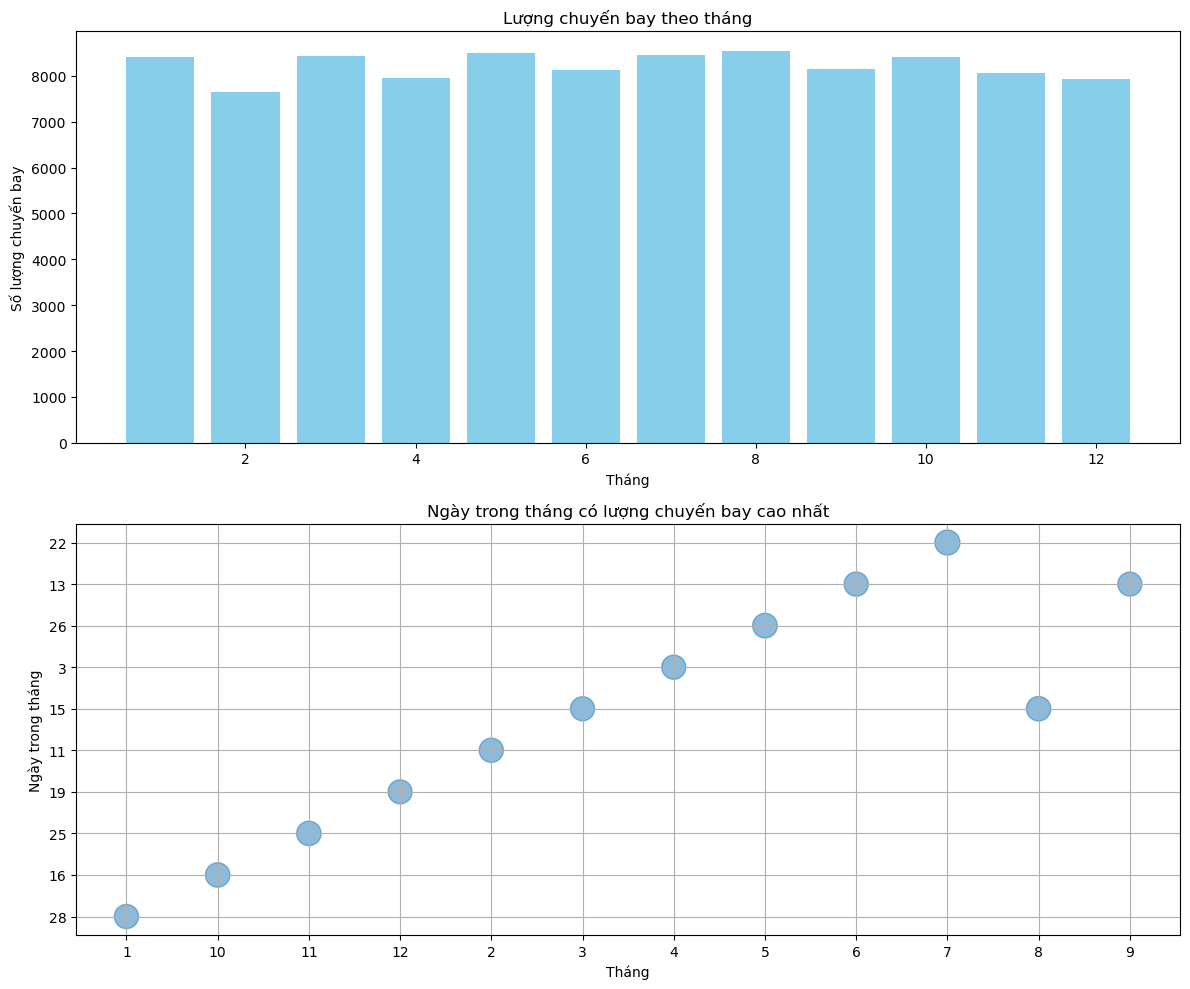

In [32]:
# Trực quan hóa kết quả
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Biểu đồ 1: Lượng chuyến bay theo tháng
axes[0].bar(monthly_flights['month'], monthly_flights['Passenger ID'], color='skyblue')
axes[0].set_title('Lượng chuyến bay theo tháng')
axes[0].set_xlabel('Tháng')
axes[0].set_ylabel('Số lượng chuyến bay')

# Biểu đồ 2: Lượng chuyến bay theo ngày trong tháng
axes[1].scatter(max_day_info['month'], max_day_info['day'], s=max_day_info['Passenger ID'], alpha=0.5)
axes[1].set_title('Ngày trong tháng có lượng chuyến bay cao nhất')
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Ngày trong tháng')
axes[1].grid(True)

plt.tight_layout()
plt.show()